In [1]:
#| echo: false
#| warning: false

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib_inline.backend_inline

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

Import `Advertising` data set

In [2]:
df_ad = pd.read_csv("../Data/Advertising.csv")

Inspect data

In [3]:
df_ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df_ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df_ad.shape

(200, 4)

## 3.1 Simple Linear regression

### 3.1.1 Estimate LR — Statmodels

In [6]:
mod1 = smf.ols("Sales ~ TV", data = df_ad).fit() # fit the LR model
print(mod1.summary()) # get full summary of the model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        00:39:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

You can also get a partial summary of the model.

In [7]:
print(mod1.summary().tables[0]) # model info

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        00:39:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


In [8]:
print(mod1.summary().tables[1]) # coefficients

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


In [9]:
print(mod1.summary().tables[2]) # model tests

Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.


The full list of the atributes you can extract from statmodels' object:

In [10]:
attr_list = [attr for attr in dir(mod1) if not attr.startswith('_')]
attr_list # list of attributes

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_criteria',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'resid_pearson',
 'rsquared',
 'rsquared_adj',
 'save',
 'scale',
 'ssr',
 'summary',
 'summary2',
 't_test',
 't_test_pairwise',
 'tvalues',
 'uncentered_tss',
 'use_t',
 'wald_test',
 'wald_test_terms',
 'wresid']

In [11]:
mod1.params # coefficients

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
mod1.pvalues # p-values

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [13]:
mod1.tvalues # t-values

Intercept    15.360275
TV           17.667626
dtype: float64

In [14]:
mod1.resid # residuals

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

In [15]:
# add rediduals to the dataframe

df_ad['resid'] = mod1.resid

In [16]:
df_ad.head()

,TV,Radio,Newspaper,Sales,resid
0,230.1,37.8,69.2,22.1,4.129225
1,44.5,39.3,45.1,10.4,1.252026
2,17.2,45.9,69.3,9.3,1.449776
3,151.5,41.3,58.5,18.5,4.265605
4,180.8,10.8,58.4,12.9,-2.727218


In [17]:
# get RSE, R2, F-statistic

mod1_rse = np.sqrt(mod1.mse_resid)
mod1_r2 = mod1.rsquared
mod1_fstat = mod1.fvalue

print("RSE: ", mod1_rse.round(3))
print("R2: ", mod1_r2.round(3))
print("F-statistic: ", mod1_fstat.round(3))

RSE:  3.259
R2:  0.612
F-statistic:  312.145


Or, present as a table:

| Quantity | Value |
| -------- | ----- |
| RSE | 3.259 |
| $R^2$ | 0.612 |
| F-statistic | 312.145 |

### 3.1.2 Estimate LR — Scikit-learn

In [18]:
#| output: false
#| warning: false

reg = linear_model.LinearRegression() # create a linear regression object

# create matrix of predictors and vector of labels
X = df_ad["TV"].values.reshape(-1, 1) # matrix of predictors
y = df_ad["Sales"].values.reshape(-1, 1) # vector of labels

# fit the model
reg.fit(X, y)

LinearRegression()

In [19]:
# get the coefficients
print(f"Intercept: {reg.intercept_[0].round(3)}, TV: {reg.coef_[0][0].round(3)}")

Intercept: 7.033, TV: 0.048


In [20]:
# get the RSE, R2, F-statistic

reg_rse = np.sqrt(((y - reg.predict(X))**2 / (len(y) - 2)).sum())
reg_r2 = reg.score(X, y)
reg_fstat = (reg_r2 / (1 - reg_r2)) * (len(y) - 2)

print("RSE: ", reg_rse.round(3))
print("R2: ", reg_r2.round(3))
print("F-statistic: ", reg_fstat.round(3))

RSE:  3.259
R2:  0.612
F-statistic:  312.145


Scikit-learn doesn't provide any summary output :(

## 3.2 Multiple Linear Regression

### 3.2.1 Estimate MLR — Statmodels

In [21]:
mod2 = smf.ols("Sales ~ TV + Radio + Newspaper", data = df_ad).fit() # fit the MLR model

Get model coefficients:

In [22]:
print(mod2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


Get regression results

In [23]:
print(mod2.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        00:39:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


Study the correlation matrix

In [24]:
df_ad.iloc[:, 0:4].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Get predicted values for `Sales` from `mod2`

In [25]:
df_ad["Sales_fitted"] = mod2.fittedvalues

In [26]:
df_ad.head()

,TV,Radio,Newspaper,Sales,resid,Sales_fitted
0,230.1,37.8,69.2,22.1,4.129225,20.523974
1,44.5,39.3,45.1,10.4,1.252026,12.337855
2,17.2,45.9,69.3,9.3,1.449776,12.307671
3,151.5,41.3,58.5,18.5,4.265605,17.597830
4,180.8,10.8,58.4,12.9,-2.727218,13.188672


Calculate fitted values manually

In [27]:
df_ad["my_Sales_fitted"] =  (mod2.params.values[1:]*df_ad.iloc[:, 0:3]).sum(axis = 1) + mod2.params.values[0]

In [28]:
df_ad.head()

,TV,Radio,Newspaper,Sales,resid,Sales_fitted,my_Sales_fitted
0,230.1,37.8,69.2,22.1,4.129225,20.523974,20.523974
1,44.5,39.3,45.1,10.4,1.252026,12.337855,12.337855
2,17.2,45.9,69.3,9.3,1.449776,12.307671,12.307671
3,151.5,41.3,58.5,18.5,4.265605,17.597830,17.597830
4,180.8,10.8,58.4,12.9,-2.727218,13.188672,13.188672


### 3.2.2 Estimate MLR — Scikit-learn

In [29]:
#| output: false
#| warning: false

reg2 = linear_model.LinearRegression()

X2 = df_ad.iloc[:, 0:3].values

reg2.fit(X2, y)

LinearRegression()

In [30]:
reg2.intercept_[0], reg2.coef_[0]

(2.9388893694594067, array([ 0.04576465,  0.18853002, -0.00103749]))

## 3.3 Other considerations in the Regression Model

### 3.3.1 Categorical Predictors — Statmodels

Import `Credit` data set

In [31]:
df_credit = pd.read_csv("../Data/Credit.csv")

In [32]:
df_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


Plot the pairplot for the `df_credit`

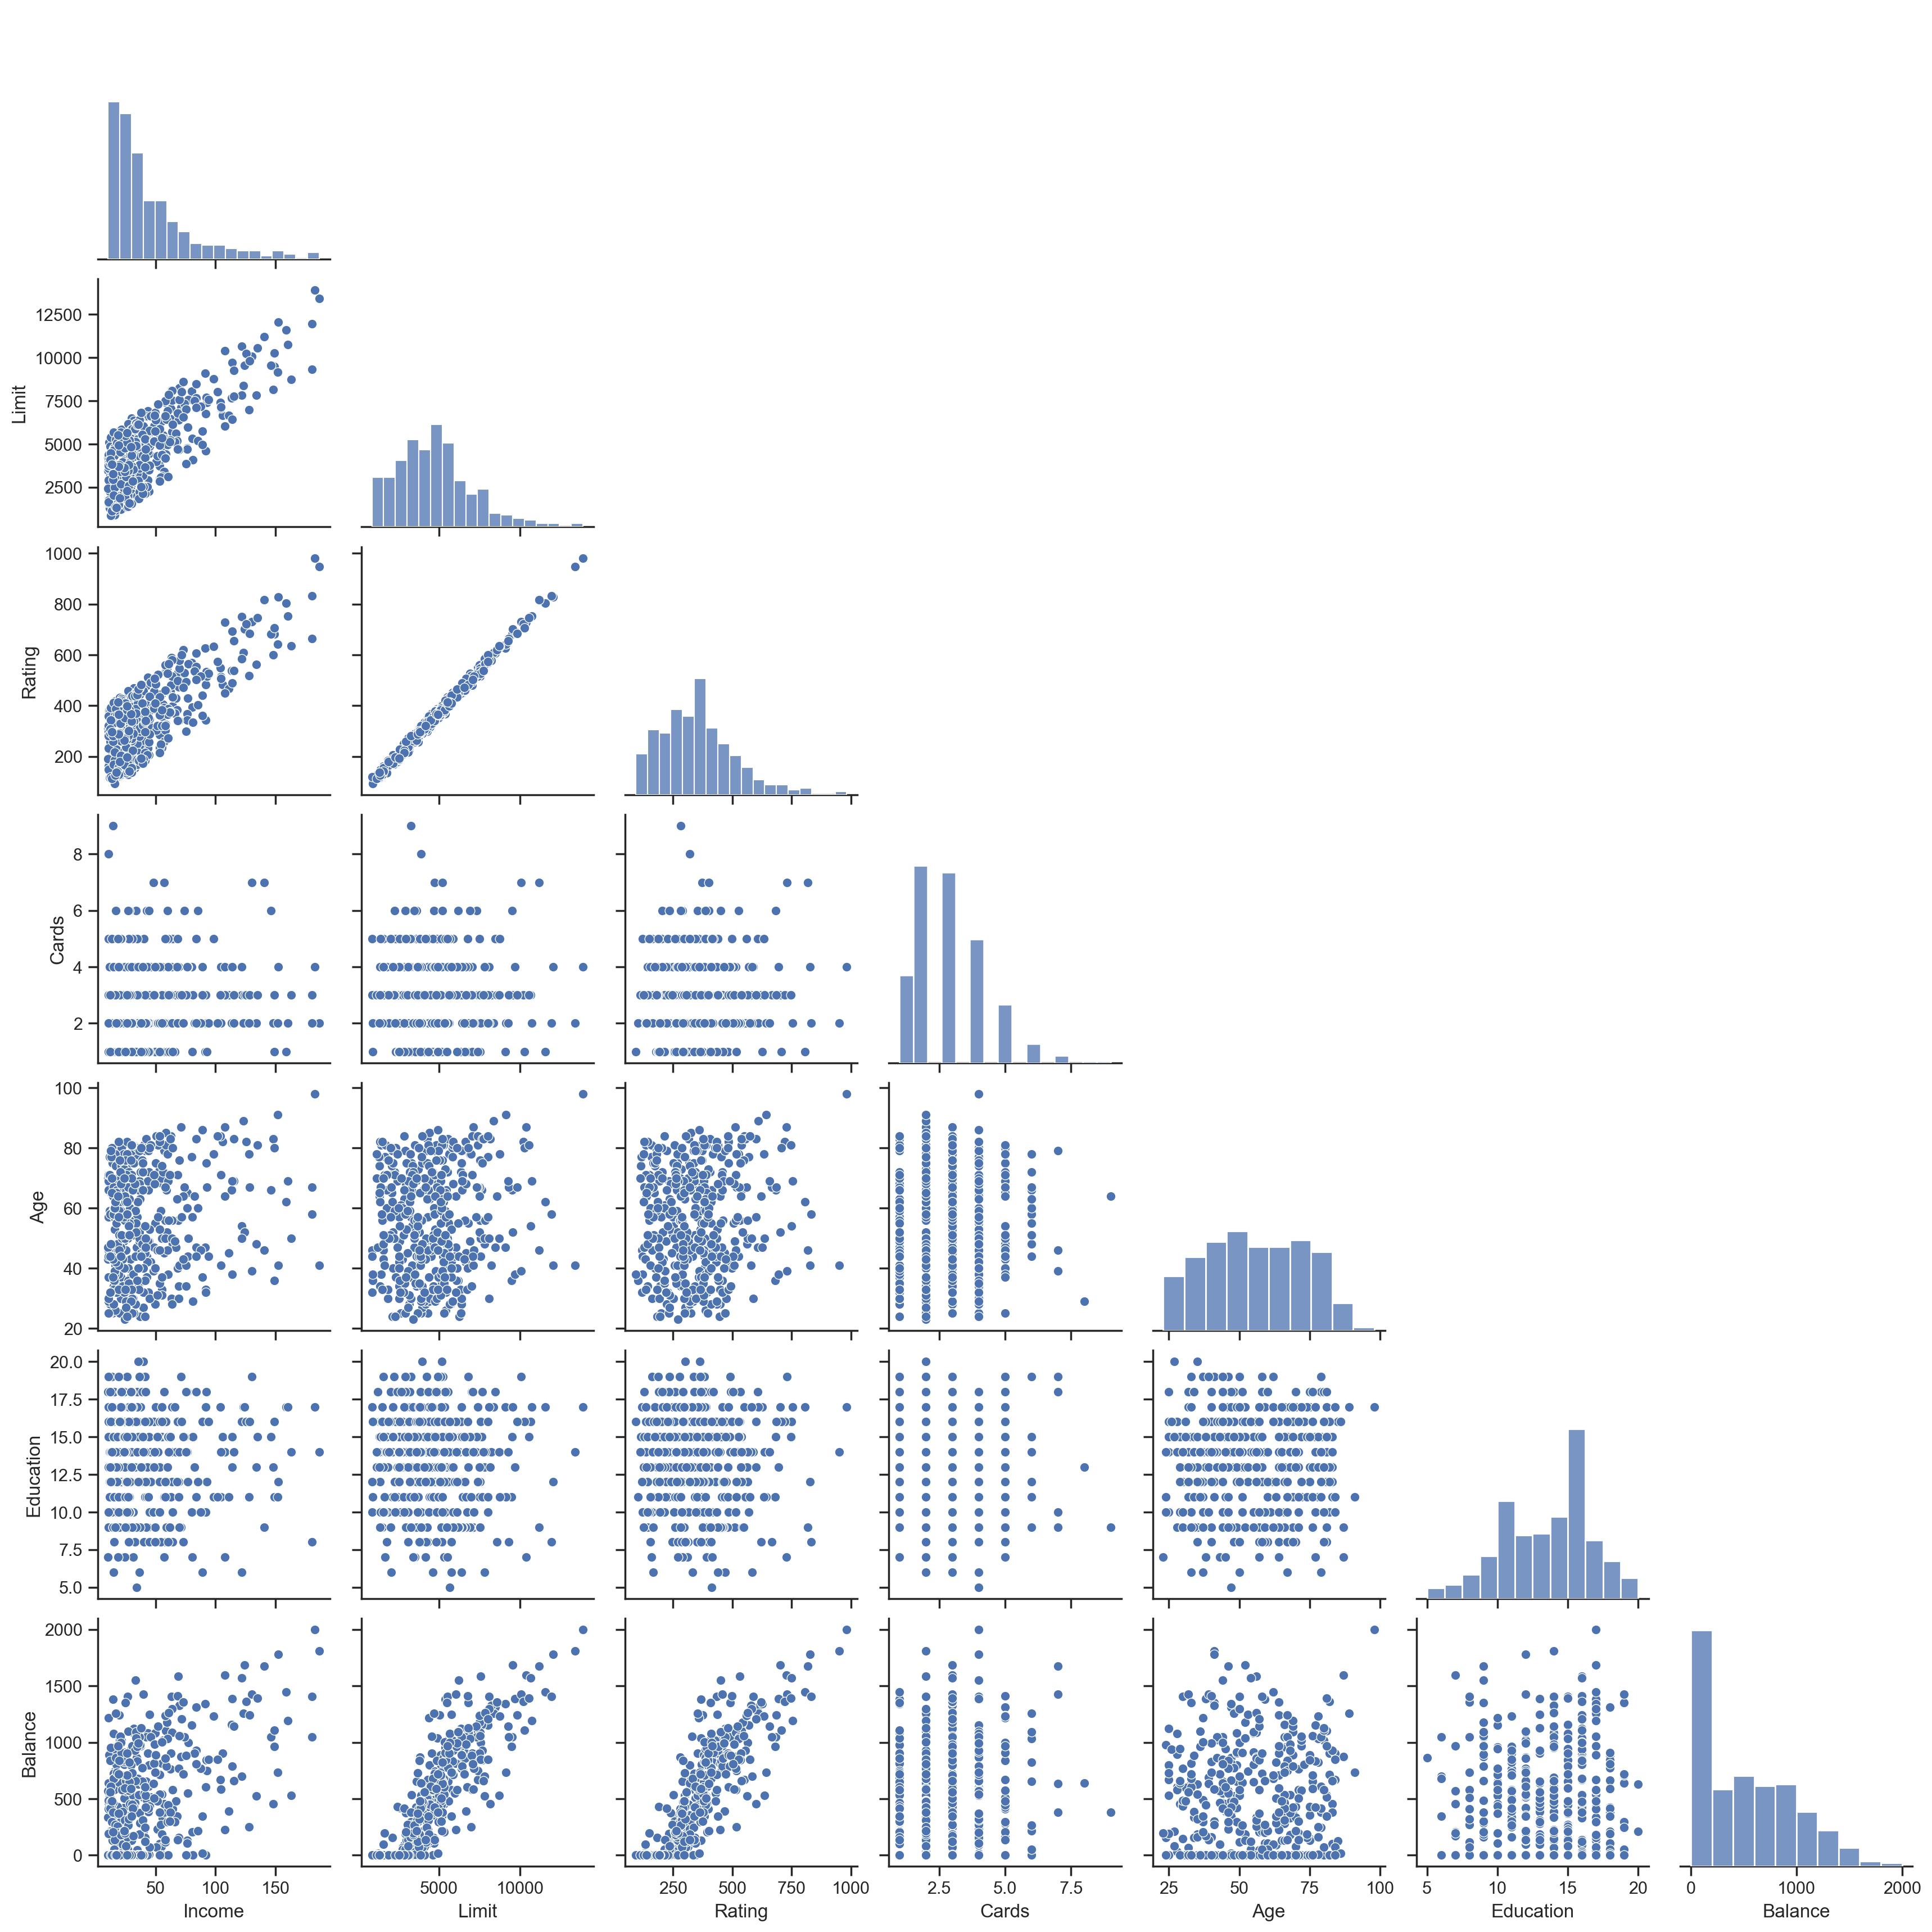

In [33]:
#| warning: false
#| fig-cap: "Pairplot of the Credit data"

plot = sns.pairplot(df_credit, diag_kind = "hist", corner = True)
#plot.fig.suptitle('Pairplot of the Credit data', size = 30)
plt.show()

Estimate the model with one categorical predictor

In [34]:
mod3 = smf.ols("Balance ~ Own", data = df_credit).fit()

Get model coefficients

In [35]:
print(mod3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Own[T.Yes]    19.7331     46.051      0.429      0.669     -70.801     110.267


Examine unique values of `Region` variable

In [36]:
df_credit["Region"].unique().tolist()

['South', 'West', 'East']

Regress `Balance` on `Region`

In [37]:
mod4 = smf.ols("Balance ~ Region", data = df_credit).fit()

In [38]:
print(mod4.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         531.0000     46.319     11.464      0.000     439.939     622.061
Region[T.South]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
Region[T.West]    -18.6863     65.021     -0.287      0.774    -146.515     109.142


### 3.3.2 Categorical Predictors — Scikit-learn

Regress `Balance` on `Own`

In [39]:
#| output: false
#| warning: false

reg3 = linear_model.LinearRegression()

X3 = (df_credit["Own"] == "Yes").astype(int).values.reshape(-1, 1)
y3 = df_credit["Balance"].values.reshape(-1, 1)

reg3.fit(X3, y3)

LinearRegression()

In [40]:
# get the coefficients

reg3.intercept_[0].round(3), reg3.coef_[0][0].round(3)

(509.803, 19.733)

Regress `Balance` on `Region`

In [41]:
#| output: false
#| warning: false

reg4 = linear_model.LinearRegression()

X4 = pd.get_dummies(df_credit["Region"]).values

reg4.fit(X4, y3)

LinearRegression()

In [42]:
# get the coefficients

reg4.intercept_[0].round(3), reg4.coef_[0].round(3)

(520.604, array([10.396, -2.106, -8.29 ]))

Match results from `statmodels`

In [43]:
intercept4 = reg4.intercept_[0] + reg4.coef_[0][0]
coef4 = reg4.coef_[0][1:] - reg4.coef_[0][0]

intercept4.round(3), coef4.round(3)

(531.0, array([-12.503, -18.686]))

### 3.3.3 Extencions of the Linear Model — Statmodels

Estimate a model for `Sales` with an interaction term

In [44]:
mod5 = smf.ols("Sales ~ TV * Radio", data = df_ad).fit()

In [45]:
print(mod5.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


Regress `Balance` on `Income`, `Student` and the `interaction`

In [46]:
mod6 = smf.ols("Balance ~ Income * Student", data = df_credit).fit()

In [47]:
print(mod6.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000     134.373     266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000     271.524     681.827
Income                    6.2182      0.592     10.502      0.000       5.054       7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249      -5.403       1.404


Import `Auto` data set

In [48]:
df_auto = pd.read_csv("../Data/Auto.csv")

In [49]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Estimate a model with non-linear variables

In [50]:
mod7 = smf.ols("mpg ~ horsepower + np.power(horsepower, 2)", data = df_auto).fit()

In [51]:
print(mod7.summary().tables[1])

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  56.9001      1.800     31.604      0.000      53.360      60.440
horsepower                 -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.power(horsepower, 2)     0.0012      0.000     10.080      0.000       0.001       0.001


Or alternatively:

In [52]:
df_auto["housepower2"] = df_auto["horsepower"]**2

mod7 = smf.ols("mpg ~ horsepower + housepower2", data = df_auto).fit()

In [53]:
print(mod7.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
housepower2     0.0012      0.000     10.080      0.000       0.001       0.001


### 3.3.4 Extencions of the Linear Model — Scikit-learn

Estimate a model for `Sales` with an interaction term

First, we need to create a new dataframe with the polynomial terms (interactions)

In [54]:
# load preprocessing module

from sklearn.preprocessing import PolynomialFeatures

In [55]:
#| output: false
#| warning: false

reg5 = linear_model.LinearRegression()
poly = PolynomialFeatures(interaction_only = True, include_bias = False)

X5 = df_ad[["TV", "Radio"]].values.reshape(-1, 2)
X5_poly = poly.fit_transform(X5)

reg5.fit(X5_poly, y)

LinearRegression()

In [56]:
# get the coefficients

reg5.intercept_[0].round(4), reg5.coef_[0].round(4)

(6.7502, array([0.0191, 0.0289, 0.0011]))

Regress `Balance` on `Income`, `Student` and the `interaction`

In [57]:
#| output: false
#| warning: false

reg6 = linear_model.LinearRegression()
poly = PolynomialFeatures(interaction_only = True, include_bias = False)

X6 = df_credit[["Income", "Student"]]
X6_copy = X6.copy()
X6_copy["Student"] = (X6["Student"] == "Yes").astype(int)
X6 = X6_copy.values.reshape(-1, 2)
X6_poly = poly.fit_transform(X6)
y6 = df_credit["Balance"].values.reshape(-1, 1)

reg6.fit(X6_poly, y6)

LinearRegression()

In [58]:
# get the coefficients

reg6.intercept_[0].round(4), reg6.coef_[0].round(4)

(200.6232, array([  6.2182, 476.6758,  -1.9992]))

Regress `mpg` on `horsepower` and `horsepower2`

In [59]:
#| output: false
#| warning: false

reg7 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree = 2, include_bias = False)

X7 = df_auto[["horsepower"]].values.reshape(-1, 1)
X7_poly = poly.fit_transform(X7)
y7 = df_auto["mpg"].values.reshape(-1, 1)

reg7.fit(X7_poly, y7)

LinearRegression()

In [60]:
# get the coefficients

reg7.intercept_[0].round(4), reg7.coef_[0].round(4)

(56.9001, array([-0.4662,  0.0012]))

Predict values of `mpg` using `reg7` and compare with actual values

In [61]:
y7_pred = reg7.predict(X7_poly)
np.c_[y7_pred, y7].round(4)[:10] # print the first 10 observations

array([[17.0915, 18.    ],
       [13.4802, 15.    ],
       [14.6587, 18.    ],
       [14.6587, 16.    ],
       [15.7521, 17.    ],
       [12.8365, 15.    ],
       [13.8963, 14.    ],
       [13.5509, 14.    ],
       [14.3033, 14.    ],
       [12.7464, 15.    ]])

Predict out-of-sample values

In [62]:
X7_test = np.array([200])
X7_test_poly = poly.transform(X7_test.reshape(-1, 1))
print(f"Test values: {X7_test_poly[0]}. Prediction: {reg7.predict(X7_test_poly).round(2)[0][0]}.")

Test values: [  200. 40000.]. Prediction: 12.88.


## 3.4 Lab: Linear Regression

### 3.4.1 Simple Linear Regression

In [63]:
# Load Boston data

df_boston = pd.read_csv("../Data/Boston.csv")

In [64]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
# fit SLR model

mod8 = smf.ols("medv ~ lstat", data = df_boston).fit()

In [66]:
# print the summary

print(mod8.summary().tables[0])
print(mod8.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        00:40:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Get confidence interval at $\alpha = 0.05$

In [67]:
mod8.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


Plot regression line

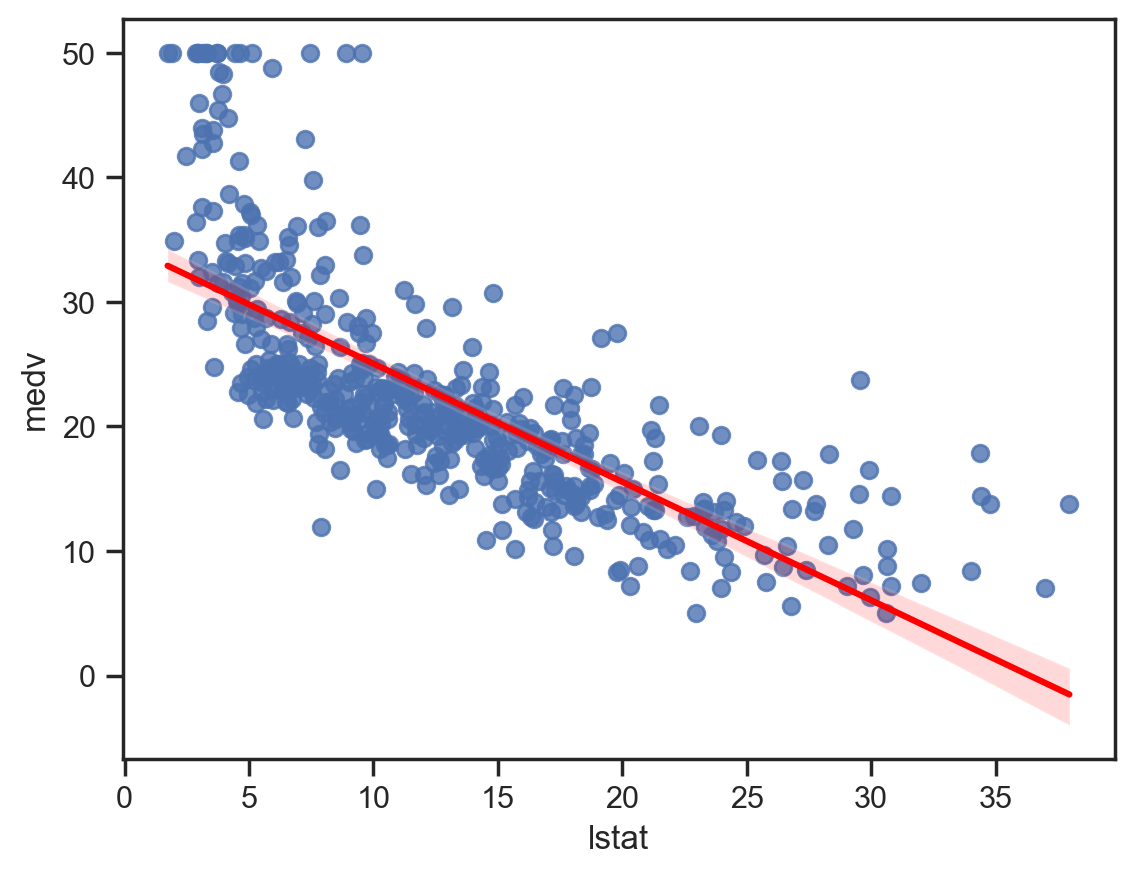

In [68]:
sns.regplot(x = "lstat", y = "medv", data = df_boston, ci = 95, line_kws = {"color": "red"})
plt.show()

### 3.4.2 Multiple Linear Regression

In [69]:
# fit MLR model

mod9 = smf.ols("medv ~ lstat + age", data = df_boston).fit()

In [70]:
print(mod9.summary().tables[0])
print(mod9.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           2.98e-88
Time:                        00:40:06   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

Fit MLR model with all variables but `black`

In [71]:
# import helper functions

from ml_helpers import my_formula

In [72]:
# create custom formula

formula_boston = my_formula(df_boston, "medv", "black")
print(formula_boston)

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat


In [73]:
# fit MLR model using the custom formula

mod10 = smf.ols(formula_boston, data = df_boston).fit()

In [74]:
# print the summary

print(mod10.summary().tables[0])
print(mod10.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          2.23e-133
Time:                        00:40:06   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

Fit MLR model using all variables but `age` and `black`

In [75]:
# create custom formula and fit MLR model

formula_boston2 = my_formula(df_boston, "medv", ["age", "black"])

mod11 = smf.ols(formula_boston2, data = df_boston).fit()

In [76]:
# print the summary

print(mod11.summary().tables[0])
print(mod11.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          2.03e-134
Time:                        00:40:06   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5251      4.920      8.441      0.0

**End of Linear Regression practice code**